In [38]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [39]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


In [40]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [83]:
def sga(crossover_f, mutation_f):
    population_size = 250
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25
    number_of_iterations = 250

    time0 = time.time()
    
    costs = np.zeros(number_of_iterations)
    
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover_f(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation_f(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
        best_chromosome = current_population[0, :]
        
        costs[t] = objective_values[0]
        print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
        
    return costs

## Crossover operators

In [42]:
def PMX(ind1, ind2):
    a = np.random.choice(len(ind1)-2, 2, False)
    i, j = a.min(), a.max()
    np.vstack((ind1[i:j],ind2[i:j])).T
    match = np.zeros(len(ind1)).astype(int)
    for p in np.vstack((ind1[i:j],ind2[i:j])).T:
        match[p[0]] = p[1]    
        match[p[1]] = p[0]
    
    child1 = np.concatenate((ind1[:i], ind2[i:j], ind1[j:]))
    child2 = np.concatenate((ind2[:i], ind1[i:j], ind2[j:]))

    for k in np.delete(np.arange(len(ind1)), np.arange(i,j)):
        while child1[k] in ind2[i:j]:
            index = np.where(ind2[i:j] == child1[k])[0][0]
            child1[k] = ind1[i:j][index]
        while child2[k] in ind1[i:j]:
            index = np.where(ind1[i:j] == child2[k])[0][0]
            child2[k] = ind2[i:j][index]
    return child1, child2

## Mutations

In [84]:
def ls_mutation(p, k=2):
    if k == 0:
        return (tsp_objective_function(p), p)
    
    permutations = [p]
    for i in range(len(p)):
        for j in range(i+1,len(p)):
            for d in range(j, len(p)):
                q = p.copy()
                q[i], q[j], q[d] = q[d], q[j], q[i]
                permutations.append(q)
    
    p_s = [(tsp_objective_function(s), s) for s in permutations]
    return min(p_s, key = lambda t: t[0])[1]

In [61]:
def ls_mutation_iter(p, k=1):
    curr_score = tsp_objective_function(p)
    curr_best = p
    candidate = ls_mutation(p,k)
    s = tsp_objective_function(candidate)
    
    while s < curr_score:
        curr_score, curr_best = s, candidate
        candidate = ls_mutation(curr_best,k)
        s = tsp_objective_function(candidate)
    return curr_best

In [52]:
costs = sga(PMX, ls_mutation)

  0     4.16259074 23249.81465481 27901.85300475 29556.82091044 1264.14154136
  1     8.65933681 21787.32354675 26101.74046402 27748.33578380 1242.72232556
  2    12.81759524 19826.21010805 24664.10981280 26092.36710972 1099.31506777
  3    17.44407010 19826.21010805 23494.91207775 24916.61137087 1073.03404992
  4    21.71808410 19460.28855168 22504.91351419 23725.83205504 938.62163936
  5    24.95164680 18183.81741648 21777.70744382 22912.64385087 895.31145668
  6    29.85419202 18183.81741648 21094.82751547 22219.50607643 860.88846079
  7    33.48885965 17472.27264309 20501.30350389 21514.27809064 776.10015857
  8    37.59924984 15830.57978043 19922.37914015 20913.86176695 812.07547927
  9    41.96430540 15809.50415238 19396.73141419 20357.79785042 837.79088538
 10    45.31845999 15534.70248181 18841.41092086 19826.21010805 816.95321455
 11    49.49560046 15356.95717500 18372.37596994 19356.32661141 784.62903687
 12    53.09644461 15352.52187909 17967.33435162 18839.59247514 754.8546

110   453.35660052 9659.63836502 9659.63836502 9659.63836502   0.00000000
111   457.00654507 9659.63836502 9659.63836502 9659.63836502   0.00000000
112   461.33459926 9659.63836502 9659.63836502 9659.63836502   0.00000000
113   465.27904010 9659.63836502 9659.63836502 9659.63836502   0.00000000
114   468.87767887 9659.63836502 9659.63836502 9659.63836502   0.00000000
115   472.70511675 9659.63836502 9659.63836502 9659.63836502   0.00000000
116   476.97055101 9659.63836502 9659.63836502 9659.63836502   0.00000000
117   480.22806692 9659.63836502 9659.63836502 9659.63836502   0.00000000
118   483.80150557 9659.63836502 9659.63836502 9659.63836502   0.00000000
119   488.21707582 9659.63836502 9659.63836502 9659.63836502   0.00000000
120   492.65329552 9659.63836502 9659.63836502 9659.63836502   0.00000000
121   496.71406364 9659.63836502 9659.63836502 9659.63836502   0.00000000
122   500.72853923 9659.63836502 9659.63836502 9659.63836502   0.00000000
123   504.92920542 9659.63836502 9659.

221   915.87499428 9659.63836502 9659.63836502 9659.63836502   0.00000000
222   919.94953918 9659.63836502 9659.63836502 9659.63836502   0.00000000
223   924.67712831 9659.63836502 9659.63836502 9659.63836502   0.00000000
224   928.83036971 9659.63836502 9659.63836502 9659.63836502   0.00000000
225   933.69497132 9659.63836502 9659.63836502 9659.63836502   0.00000000
226   937.70863938 9659.63836502 9659.63836502 9659.63836502   0.00000000
227   941.52106500 9659.63836502 9659.63836502 9659.63836502   0.00000000
228   945.36043644 9659.63836502 9659.63836502 9659.63836502   0.00000000
229   949.98803663 9659.63836502 9659.63836502 9659.63836502   0.00000000
230   954.15144110 9659.63836502 9659.63836502 9659.63836502   0.00000000
231   958.73261404 9659.63836502 9659.63836502 9659.63836502   0.00000000
232   963.06955171 9659.63836502 9659.63836502 9659.63836502   0.00000000
233   968.01832461 9659.63836502 9659.63836502 9659.63836502   0.00000000
234   972.30981779 9659.63836502 9659.

In [85]:
costs_ls = sga(PMX, ls_mutation)

  0    37.51870131 23153.57274524 27996.68679158 29667.82302915 1262.86940045
  1    66.49418020 21789.28748811 26428.01155025 27969.29960518 1078.01367681
  2   102.15378165 21789.28748811 25241.78024706 26501.85085184 1024.89696777
  3   135.73670769 21211.01164283 24186.88237348 25372.63319790 966.15179648
  4   168.66241384 20102.32111642 23288.73303329 24418.19759263 902.71849908
  5   205.53515482 19138.42806748 22381.11663653 23601.41826584 944.70084311
  6   238.38546062 18367.25357138 21640.83321070 22774.03704221 895.57992101
  7   276.37576985 18308.04042249 20869.61280661 21902.74292290 839.75471462
  8   310.81674480 17674.28528321 20139.90424364 21228.34837949 804.52867832
  9   343.42378306 15675.24046918 19455.44003958 20423.63434184 709.61401841
 10   381.62837005 15675.24046918 18924.06084403 19793.14274518 646.94631737
 11   415.23198414 15675.24046918 18404.50133734 19161.12610703 660.45953641
 12   453.57662606 15675.24046918 17929.41292064 18701.63032595 682.08268

107  3786.39981818 10018.22255375 10018.22255375 10018.22255375   0.00000000
108  3821.24485111 10018.22255375 10018.22255375 10018.22255375   0.00000000
109  3857.77555108 10018.22255375 10018.22255375 10018.22255375   0.00000000
110  3896.55065465 10018.22255375 10018.22255375 10018.22255375   0.00000000
111  3926.70056653 10018.22255375 10018.22255375 10018.22255375   0.00000000
112  3969.52300453 10018.22255375 10018.22255375 10018.22255375   0.00000000
113  4005.14783883 10018.22255375 10018.22255375 10018.22255375   0.00000000
114  4039.01722860 10018.22255375 10018.22255375 10018.22255375   0.00000000
115  4070.55292249 10018.22255375 10018.22255375 10018.22255375   0.00000000
116  4108.49491715 10018.22255375 10018.22255375 10018.22255375   0.00000000
117  4154.32616353 10018.22255375 10018.22255375 10018.22255375   0.00000000
118  4190.42917037 10018.22255375 10018.22255375 10018.22255375   0.00000000
119  4236.79143238 10018.22255375 10018.22255375 10018.22255375   0.00000000

214  7619.26752067 10018.22255375 10018.22255375 10018.22255375   0.00000000
215  7657.19698262 10018.22255375 10018.22255375 10018.22255375   0.00000000
216  7694.17500424 10018.22255375 10018.22255375 10018.22255375   0.00000000
217  7738.38007355 10018.22255375 10018.22255375 10018.22255375   0.00000000
218  7774.56647182 10018.22255375 10018.22255375 10018.22255375   0.00000000
219  7804.78126502 10018.22255375 10018.22255375 10018.22255375   0.00000000
220  7842.35949707 10018.22255375 10018.22255375 10018.22255375   0.00000000
221  7874.30443144 10018.22255375 10018.22255375 10018.22255375   0.00000000
222  7908.56768632 10018.22255375 10018.22255375 10018.22255375   0.00000000
223  7941.02160215 10018.22255375 10018.22255375 10018.22255375   0.00000000
224  7971.84004045 10018.22255375 10018.22255375 10018.22255375   0.00000000
225  8002.50625014 10018.22255375 10018.22255375 10018.22255375   0.00000000
226  8052.91422606 10018.22255375 10018.22255375 10018.22255375   0.00000000

In [62]:
costs_iter = sga(PMX, ls_mutation_iter)

  0   164.37738800 8982.19307610 24688.53622893 29422.86167687 7217.14623099
  1   248.33887053 8898.53034384 12430.42703797 19190.72117467 2603.68049735
  2   330.02686882 8782.59465353 10658.95862729 12734.54965009 933.84983064
  3   402.37884283 8782.59465353 10130.93110354 11092.10993767 534.35936476
  4   471.76180553 8674.49596764 9878.64703762 10546.41306253 414.35647246
  5   533.65755630 8674.49596764 9704.10918236 10206.05724532 328.96708801
  6   593.20878458 8596.12268018 9543.75092668 9980.44569801 282.61545881
  7   649.56191587 8349.30989282 9418.71963868 9777.86564768 271.98106265
  8   708.90417504 8349.30989282 9305.25485502 9641.51554037 254.36656409
  9   756.40076685 8229.01574470 9192.35262867 9516.12615816 256.51104319
 10   812.30209899 8229.01574470 9061.59799073 9380.51227716 258.74527504
 11   866.13255835 8229.01574470 8954.33253788 9264.81943273 246.73492850
 12   913.65954304 8229.01574470 8807.39542326 9123.76367305 229.92291866
 13   961.37176299 7963.52

111  1531.60608506 7710.82646022 7710.82646022 7710.82646022   0.00000000
112  1535.81127357 7710.82646022 7710.82646022 7710.82646022   0.00000000
113  1539.43870854 7710.82646022 7710.82646022 7710.82646022   0.00000000
114  1543.38549066 7710.82646022 7710.82646022 7710.82646022   0.00000000
115  1547.33983374 7710.82646022 7710.82646022 7710.82646022   0.00000000
116  1551.37199140 7710.82646022 7710.82646022 7710.82646022   0.00000000
117  1555.39371681 7710.82646022 7710.82646022 7710.82646022   0.00000000
118  1559.68000245 7710.82646022 7710.82646022 7710.82646022   0.00000000
119  1563.60088515 7710.82646022 7710.82646022 7710.82646022   0.00000000
120  1567.40410376 7710.82646022 7710.82646022 7710.82646022   0.00000000
121  1571.51076722 7710.82646022 7710.82646022 7710.82646022   0.00000000
122  1575.24348664 7710.82646022 7710.82646022 7710.82646022   0.00000000
123  1578.48220921 7710.82646022 7710.82646022 7710.82646022   0.00000000
124  1582.89385438 7710.82646022 7710.

222  1971.88868666 7710.82646022 7710.82646022 7710.82646022   0.00000000
223  1975.32446289 7710.82646022 7710.82646022 7710.82646022   0.00000000
224  1979.57611918 7710.82646022 7710.82646022 7710.82646022   0.00000000
225  1983.05899000 7710.82646022 7710.82646022 7710.82646022   0.00000000
226  1987.57003641 7710.82646022 7710.82646022 7710.82646022   0.00000000
227  1991.57472539 7710.82646022 7710.82646022 7710.82646022   0.00000000
228  1995.86055136 7710.82646022 7710.82646022 7710.82646022   0.00000000
229  1999.83578873 7710.82646022 7710.82646022 7710.82646022   0.00000000
230  2003.59466958 7710.82646022 7710.82646022 7710.82646022   0.00000000
231  2006.98127794 7710.82646022 7710.82646022 7710.82646022   0.00000000
232  2011.45756984 7710.82646022 7710.82646022 7710.82646022   0.00000000
233  2015.66998029 7710.82646022 7710.82646022 7710.82646022   0.00000000
234  2019.54968238 7710.82646022 7710.82646022 7710.82646022   0.00000000
235  2022.72914004 7710.82646022 7710.

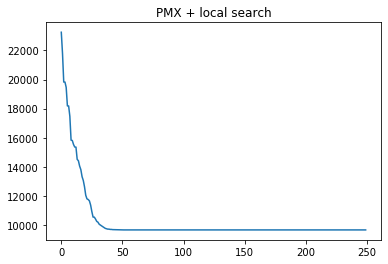

og_opt 7544.365901904086
opt:  9659.63836501815


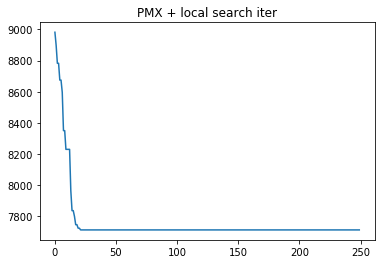

og_opt 7544.365901904086
opt:  7710.826460219718


In [65]:
plt.figure()
plt.title('PMX + local search')
plt.plot(costs)
plt.show()
print('og_opt',tsp_objective_function(p))
print('opt: ',np.min(costs))
plt.figure()
plt.title('PMX + local search iter')
plt.plot(costs_iter)
plt.show()
print('og_opt',tsp_objective_function(p))
print('opt: ',np.min(costs_iter))